In [ ]:
!pip install GPyOpt --quiet
!pip install GPy --quiet

In [2]:
#import packages

#basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

#Bayesian optimization packages
import GPy
import GPyOpt

#ML Algorithm packages
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import preprocessing

In [3]:
#dataset = UCI Car Evaluation
names=['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv('car.data', names = names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
#Convert categorical labels to numbers
le = preprocessing.LabelEncoder()

for col in names: 
  df[col] = le.fit_transform(df[col])

In [5]:
X = df.drop(['class'], axis=1)
y = df['class']

#splitting train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
#K-fold validation
def kfold_score(clf,X,y,n_fold):
    X,y = X.values,y.values
    kfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
    accuracy_list = []

    for train_index, test_index in kfold.split(X, y):
        x_train_fold, x_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        clf.fit(x_train_fold, y_train_fold)
        preds = clf.predict(x_test_fold)
        accuracy_test = accuracy_score(preds,y_test_fold)
        accuracy_list.append(accuracy_test)
    return np.array(accuracy_list).mean()

In [22]:
max_features = [1,2,3,4,5]
n_estimators = np.linspace(1,200,101,dtype=int)

x1, x2 = np.meshgrid(max_features,n_estimators)

In [23]:
rf1_score=[]

for i in range(len(max_features)):
  for j in range(len(n_estimators)):
    clf = RandomForestClassifier(max_features=max_features[i],n_estimators=n_estimators[j])
    clf.fit(X_train,y_train)
    score = kfold_score(clf,X_train, y_train,10)
    rf1_score.append(score)

In [24]:
y=x1*x2

Text(0, 0.5, 'n_neighbors')

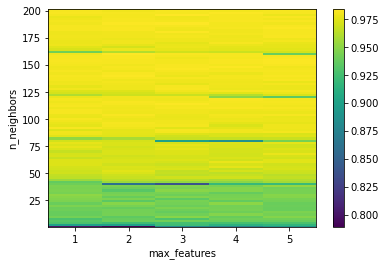

In [31]:
rf1_score=np.reshape(rf1_score,y.shape)
fig, ax = plt.subplots()
plot1 = ax.pcolormesh(x1, x2, rf1_score)
fig.colorbar(plot1, ax=ax)
plt.xlabel("max_features")
plt.ylabel("n_neighbors")

In [32]:
C_log = np.linspace(-2,2,51)
gamma_log = np.linspace(-3,2,51)
x1,x2 = np.meshgrid(C_log,gamma_log)
SVM1_score=[]

In [33]:
for i in range(len(C_log)):
  for j in range(len(gamma_log)):
    clf = svm.SVC(C=10**(C_log[i]),gamma=10**(gamma_log[j]))
    clf.fit(X_train,y_train)
    score = kfold_score(clf,X_train, y_train,10)
    SVM1_score.append(score)

Text(0, 0.5, 'log_gamma')

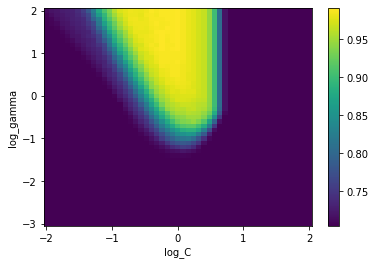

In [36]:
y=x1*x2
SVM1_score=np.reshape(SVM1_score,y.shape)
fig, ax = plt.subplots()
plot2 = ax.pcolormesh(x1, x2, SVM1_score)
fig.colorbar(plot2, ax=ax)
plt.xlabel("log_C")
plt.ylabel("log_gamma")

In [37]:
leaf_size = np.linspace(1,200,101)
n_neighbors = [3,4,5,6,7,8,9]
KNN1_score=[]
x1,x2=np.meshgrid(leaf_size,n_neighbors)

In [38]:
for i in range(len(leaf_size)):
  for j in range(len(n_neighbors)):
    clf = KNeighborsClassifier(leaf_size=leaf_size[i],n_neighbors=n_neighbors[j])
    clf.fit(X_train,y_train)
    score = kfold_score(clf,X_train, y_train,10)
    KNN1_score.append(score)

Text(0, 0.5, 'n_neighbors')

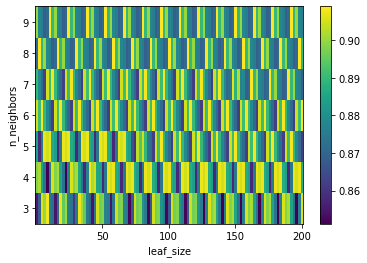

In [39]:
y=x1*x2
KNN1_score=np.reshape(KNN1_score,y.shape)
fig, ax = plt.subplots()
plot3 = ax.pcolormesh(x1, x2, KNN1_score)
fig.colorbar(plot3, ax=ax)
plt.xlabel("leaf_size")
plt.ylabel("n_neighbors")